<a href="https://colab.research.google.com/github/Ishan12z1/BirdShotterGame/blob/main/hw1_50610512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

### a. Load the data into the DataFrame using the URL. (You loose points if reading from local folder)

In [230]:
url='https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD'
df=pd.read_csv(url)

## b. Initial Exploratory and visualization:

### i. Print the metadata of column information.

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978628 entries, 0 to 978627
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           978628 non-null  int64  
 1   Date Rptd       978628 non-null  object 
 2   DATE OCC        978628 non-null  object 
 3   TIME OCC        978628 non-null  int64  
 4   AREA            978628 non-null  int64  
 5   AREA NAME       978628 non-null  object 
 6   Rpt Dist No     978628 non-null  int64  
 7   Part 1-2        978628 non-null  int64  
 8   Crm Cd          978628 non-null  int64  
 9   Crm Cd Desc     978628 non-null  object 
 10  Mocodes         834648 non-null  object 
 11  Vict Age        978628 non-null  int64  
 12  Vict Sex        841430 non-null  object 
 13  Vict Descent    841419 non-null  object 
 14  Premis Cd       978613 non-null  float64
 15  Premis Desc     978043 non-null  object 
 16  Weapon Used Cd  325959 non-null  float64
 17  Weapon Des

In [232]:
df.describe() # Printing more info about each column

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.786280e+05,978628.000000,978628.000000,978628.000000,978628.000000,978628.000000,978628.000000,978613.000000,325959.000000,978617.000000,68816.000000,2309.000000,64.00000,978628.000000,978628.000000
mean,2.196564e+08,1338.802627,10.702561,1116.686084,1.404785,500.810635,29.122904,306.181502,363.815372,500.564847,958.156344,984.192724,991.21875,33.995399,-118.081108
std,1.290395e+07,651.622947,6.107280,610.836054,0.490851,206.309796,21.961531,218.908131,123.673988,206.107451,110.251477,51.506344,27.06985,1.640056,5.684520
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.106073e+08,900.000000,5.000000,589.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430500
50%,2.208116e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.309110e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499253e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


In [233]:
df.head(5) # Printing first 5 rows of the data frame

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


### ii.  What is the total number of crimes committed according to the description of the crime code? Make a visualization using just one graph that shows a distribution of several crimes.

In [234]:
df['Crm Cd Desc'].value_counts()

,count
Crm Cd Desc,
VEHICLE - STOLEN,109906
BATTERY - SIMPLE ASSAULT,74665
BURGLARY FROM VEHICLE,61012
THEFT OF IDENTITY,60597
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",59410
...,...
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO),5
FIREARMS RESTRAINING ORDER (FIREARMS RO),4
DISHONEST EMPLOYEE ATTEMPTED THEFT,4


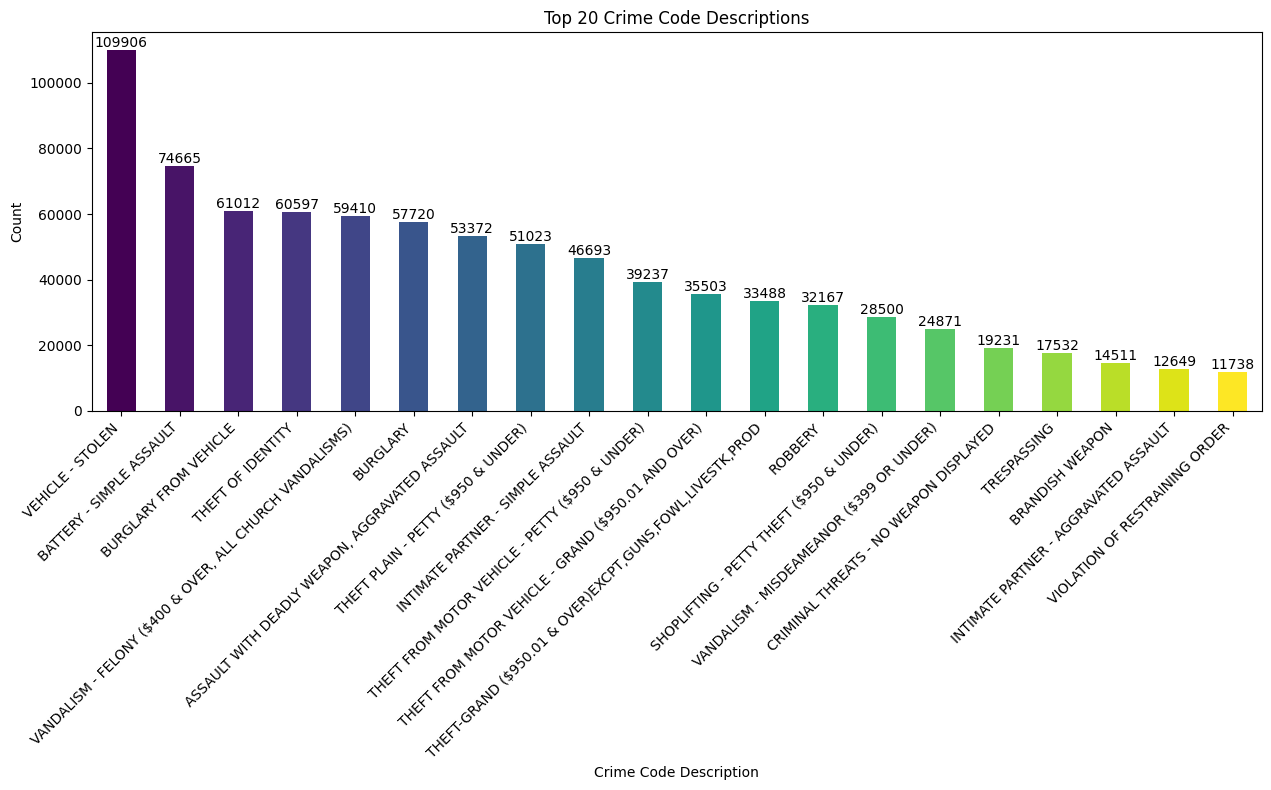

In [235]:
# Plotting top 20 crimes
top_20_crm_cd_desc = df['Crm Cd Desc'].value_counts().head(20)

plt.figure(figsize=(13, 8))
ax = top_20_crm_cd_desc.plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, len(top_20_crm_cd_desc))))
plt.title('Top 20 Crime Code Descriptions')
plt.xlabel('Crime Code Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(top_20_crm_cd_desc):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### iii. Make a visualization to suggest highest crime prone areas. You may plot multiple graphs.

<Axes: ylabel='AREA NAME'>

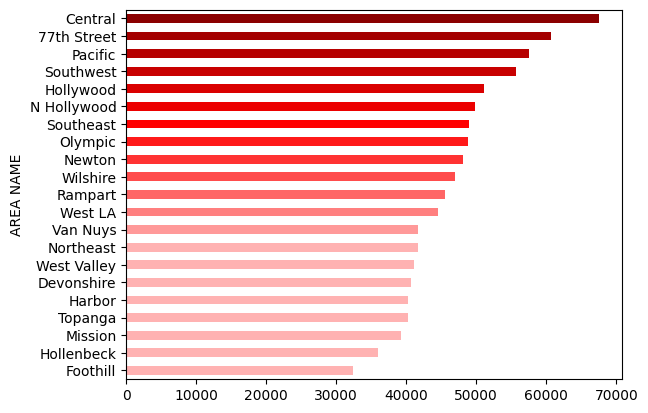

In [236]:
barh_colors = ['#FFB2B2', '#FFB2B2', '#FFB2B2', '#FFB2B2', '#FFB2B2', '#FFB2B2', '#FFB2B2', '#FFB2B2', '#FF9999',
               '#FF7F7F', '#FF6666', '#FF4C4C',
               '#FF3232', '#FF1919', '#FF0000', '#EC0000', '#DA0000', '#C80000',
               '#B60000', '#A40000', '#8B0000']

df['AREA NAME'].value_counts(ascending=True).plot.barh(color=barh_colors)

<Axes: ylabel='count'>

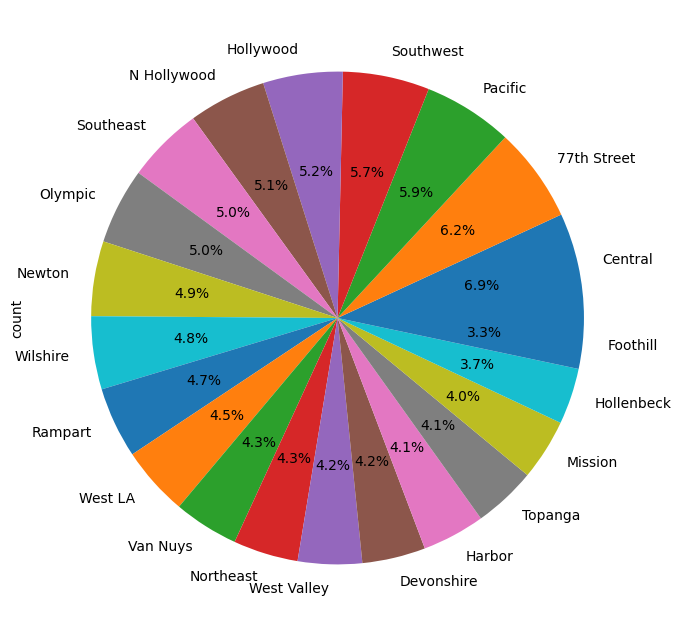

In [237]:
df['AREA NAME'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))

### iv. Make a visualization to warn general public about the trend crimes according to the time of crime occurence, sex and age of victim and the area in which it can occur. You may plot multiple graphs.

#### Trends of Victim Sex and Area

In [238]:
# Replacing gender value to 'Unknown' if not 'M' or 'F'
df['Vict Sex'] = df['Vict Sex'].apply(lambda x: x if x in ['M', 'F'] else 'Unknown')

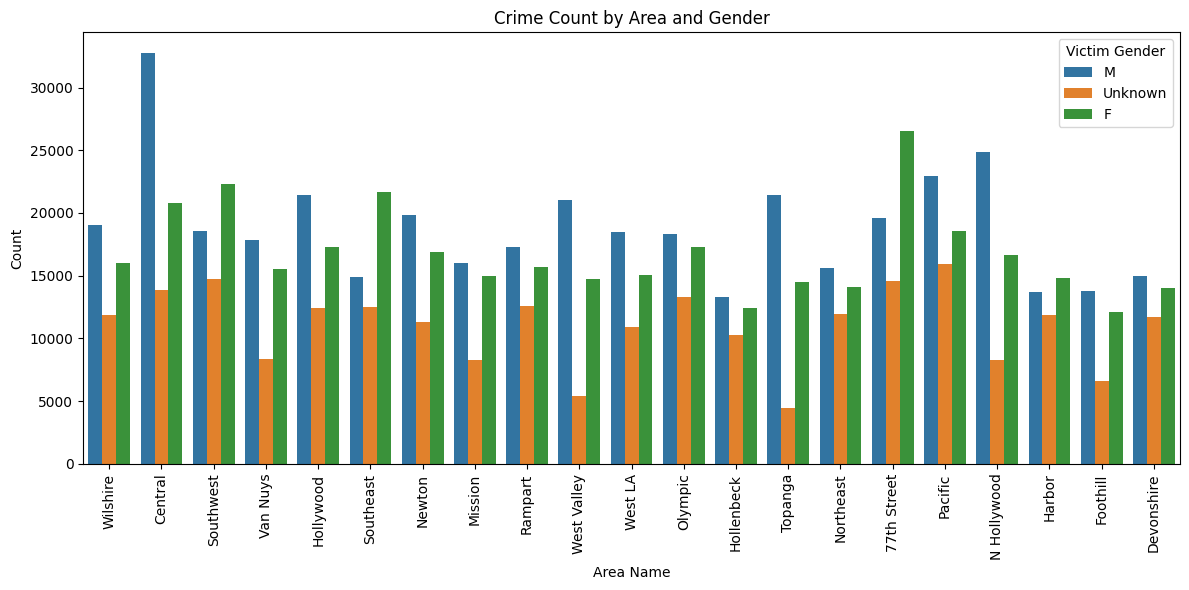

In [239]:
# Creating a plot between Victim Gender and Area name to which gender is prone to crime in which area
plt.figure(figsize=(12, 6))
sns.countplot(x='AREA NAME', hue='Vict Sex', data=df)
plt.title('Crime Count by Area and Gender')
plt.xlabel('Area Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Victim Gender')
plt.tight_layout()
plt.show()


From the above description it is clear that Males are prone to more crime than Female and Central area has the highest crime count for males while 77th street for females

#### Trends of Victim Age and Victim Sex


In [240]:
df['Vict Age'].value_counts()

,count
Vict Age,
0,257559
30,21817
35,21366
31,20958
29,20889
...,...
98,71
-2,29
-3,5


In [241]:
# Replacing the age less than 18 or greated than 90 to mean of the age
df=df[(df['Vict Age']>=0) & (df['Vict Age'] < 90)]
mean_age = df['Vict Age'].mean()
df['Vict Age'] = np.where((df['Vict Age'] <= 18) | (df['Vict Age'] > 90), mean_age, df['Vict Age'])

<ipython-input-241-c795d9f1e5df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vict Age'] = np.where((df['Vict Age'] <= 18) | (df['Vict Age'] > 90), mean_age, df['Vict Age'])


In [242]:
df_known_vict_sex=df[df['Vict Sex'].isin(['M', 'F'])]

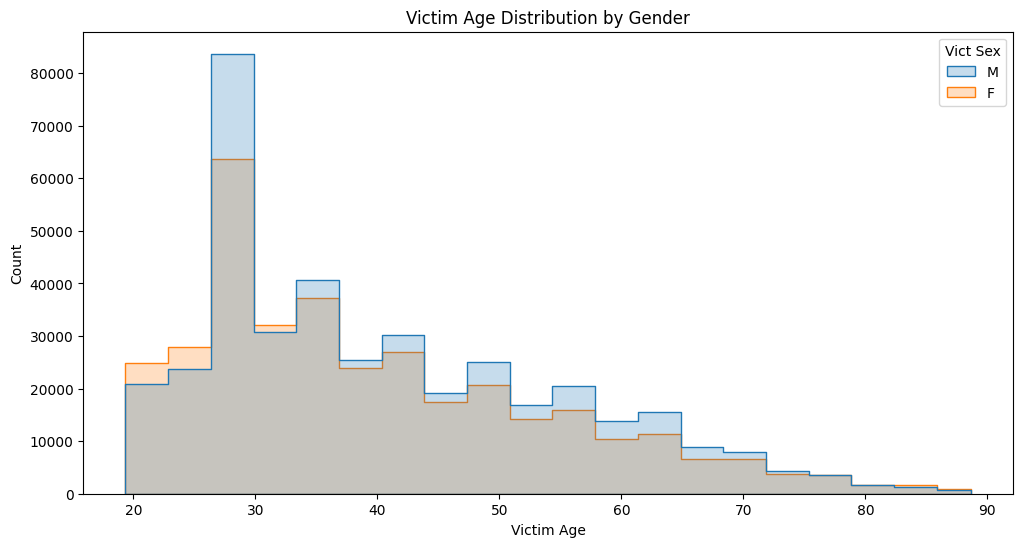

In [243]:
# Plotting a graph between age and sex (removing unknown sex data)
plt.figure(figsize=(12, 6))
sns.histplot(x='Vict Age', hue='Vict Sex', data=df_known_vict_sex, bins=20,element='step', stat='count', shrink=0.8,)
plt.title('Victim Age Distribution by Gender')
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.show()


From the above graph we can see that people between age of 27-35 are more in danger and specillay Males in this age group are more prone to crimes.

#### Trend of Crime comitted and hour of the day


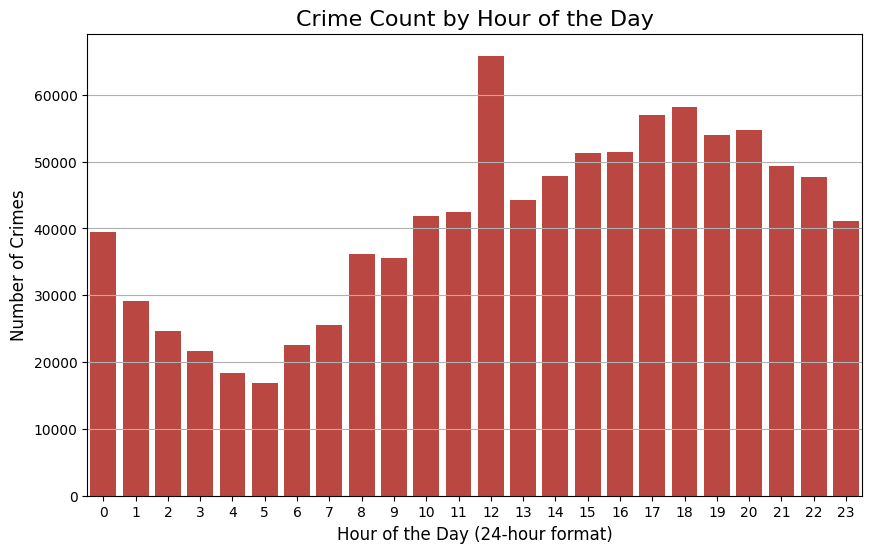

In [244]:

def format_time(time):
    time_str = f"{time:04d}"  # Ensure 4-digit format
    return f"{time_str[:2]}:{time_str[2:]}"  # Convert to 'HH:MM' format


df['formatted_time'] = df['TIME OCC'].apply(format_time)


df['formatted_time'] = pd.to_datetime(df['formatted_time'], format='%H:%M')
df['hour'] = df['formatted_time'].dt.hour


crime_by_hour = df['hour'].value_counts().sort_index().reset_index()
crime_by_hour.columns = ['hour', 'crime_count']


plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='crime_count', data=crime_by_hour, color='#cf352e')


plt.title('Crime Count by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y')


plt.show()


From the above bar graph it is clear that as night approches crime increase and the most crime happens at 12'o clock in the afternoon

## c. Investigating Patterns of Vehicle Thefts in Los Angeles:

### (i) Apply conditions to make it a valid problem statement. Also provide features which you think are important according to your problem statement.



#### Problem Statement

 How the trend of vehicle crimes has changed over the past years(2020-204) and what factors have contributed to the rise or fall of crime related to vehicle theft ?  


       
We do this to understand how crime has changes over the years and is there any pattern here we can identify, which can help us to prevent crime in the future or can be used by people to stay alert during a certain time of the day or month.
Important features to consider:
- `Time OCC`
- `Date OCC`
- `Year`
- `Month`
- `Hour`
- `Area`
- `Crm Cd Desc`

### ii.Explain your approach to your problem statement

To find out the data trend in crime related to vechile theft over the years first we have to consider which columns are important to us. In this case the columns given above (Time OCC,Date OCC,Year,Month,Hour,Area,Crm Cd Desc) are important to. Some columns above we will need to calculate through the help of other columns like month from Dare OCC. After this we will need to find trend in data through data analysis and we can do this by plotting graphs to figure out patterns in data. By undertanding the graphs and our analysis of it we can then find out how the crime rate trend have changed over the years.


In [245]:
# Consider the data that is related to theft of vehicle crime
df_vehicle=df[df['Crm Cd Desc'].isin(['VEHICLE - STOLEN',
                                      'VEHICLE - ATTEMPT STOLEN',
                                      'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)'
                                      ])]

df_vehicle.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,formatted_time,hour
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,29.020615,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,1900-01-01 21:30:00,21
13,221008844,05/06/2022 12:00:00 AM,11/01/2020 12:00:00 AM,130,10,West Valley,1029,1,510,VEHICLE - STOLEN,NaN,29.020615,Unknown,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VALJEAN ST,VANOWEN AV,34.1939,-118.4859,1900-01-01 01:30:00,1
23,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,29.020615,Unknown,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,1900-01-01 06:30:00,6
27,200209713,05/03/2020 12:00:00 AM,05/02/2020 12:00:00 AM,1800,2,Rampart,245,1,510,VEHICLE - STOLEN,NaN,29.020615,Unknown,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 W 4TH ST,NaN,34.0642,-118.2771,1900-01-01 18:00:00,18
78,201810154,04/26/2020 12:00:00 AM,04/22/2020 12:00:00 AM,1900,18,Southeast,1802,1,510,VEHICLE - STOLEN,NaN,29.020615,Unknown,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,90TH,WALL,33.9547,-118.2717,1900-01-01 19:00:00,19


### iii. Perform data cleaning to get the pure data for this problem. Explain your data cleaning steps.( At least 3 cleaning steps)

#### Data Cleaning Steps :  

1. Changing the data type: Here the format of `DATE OCC` and `Date Rptd` is in dtype object and changing it to data type of datetime so that we can efficently utilize the data.



In [246]:
df_vehicle['DATE OCC']=pd.to_datetime(df_vehicle['DATE OCC'])
df_vehicle['Date Rptd']=pd.to_datetime(df_vehicle['Date Rptd'])

<ipython-input-246-545b7b9f3290>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vehicle['DATE OCC']=pd.to_datetime(df_vehicle['DATE OCC'])
<ipython-input-246-545b7b9f3290>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle['DATE OCC']=pd.to_datetime(df_vehicle['DATE OCC'])
<ipython-input-246-545b7b9f3290>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vehicle['Date Rptd']=pd.to_datetime(df_vehicle['Date Rptd'])
<ipython-input-246-545b7b9f3290>:2: Settin

2. Dealing with Null values : Dropping all the coloumns that has more tha 75% of values null and then dropiing rows that contains any null values.

In [247]:
df_vehicle.shape

(116316, 30)

In [248]:
df_vehicle=df_vehicle.dropna(thresh=df_vehicle.shape[0]*0.75,axis=1)
df_vehicle=df_vehicle.dropna()

In [249]:
df_vehicle.shape

(116309, 22)

3. Adding new columns : Adding new columns that is useful to us


In [250]:
df_vehicle['Month'] = df_vehicle['DATE OCC'].dt.month
df_vehicle['Year'] = df_vehicle['DATE OCC'].dt.year

<ipython-input-250-66c199b5d49a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle['Month'] = df_vehicle['DATE OCC'].dt.month
<ipython-input-250-66c199b5d49a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle['Year'] = df_vehicle['DATE OCC'].dt.year


4. Removing duplicates

In [251]:
df_vehicle.drop_duplicates('DR_NO')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,formatted_time,hour,Month,Year
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,29.020615,M,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,1900-01-01 21:30:00,21,3,2020
13,221008844,2022-05-06,2020-11-01,130,10,West Valley,1029,1,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,VALJEAN ST,34.1939,-118.4859,1900-01-01 01:30:00,1,11,2020
23,200412582,2020-09-09,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,200 E AVENUE 28,34.0820,-118.2130,1900-01-01 06:30:00,6,9,2020
27,200209713,2020-05-03,2020-05-02,1800,2,Rampart,245,1,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,2500 W 4TH ST,34.0642,-118.2771,1900-01-01 18:00:00,18,5,2020
78,201810154,2020-04-26,2020-04-22,1900,18,Southeast,1802,1,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,90TH,33.9547,-118.2717,1900-01-01 19:00:00,19,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978606,240112635,2024-06-10,2024-06-10,1855,1,Central,138,1,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,300 S ALAMEDA ST,34.0468,-118.2415,1900-01-01 18:55:00,18,6,2024
978607,241304056,2024-01-02,2024-01-01,2100,13,Newton,1347,1,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,41ST,34.0072,-118.2432,1900-01-01 21:00:00,21,1,2024
978611,241406728,2024-02-29,2024-02-28,100,14,Pacific,1415,1,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,1300 APPLETON WY,34.0038,-118.4553,1900-01-01 01:00:00,1,2,2024
978623,240710284,2024-07-24,2024-07-23,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,4000 W 23RD ST,34.0362,-118.3284,1900-01-01 14:00:00,14,7,2024


In [252]:
df_vehicle.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,formatted_time,hour,Month,Year
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,29.020615,M,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,1900-01-01 21:30:00,21,3,2020
13,221008844,2022-05-06,2020-11-01,130,10,West Valley,1029,1,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,VALJEAN ST,34.1939,-118.4859,1900-01-01 01:30:00,1,11,2020
23,200412582,2020-09-09,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,200 E AVENUE 28,34.0820,-118.2130,1900-01-01 06:30:00,6,9,2020
27,200209713,2020-05-03,2020-05-02,1800,2,Rampart,245,1,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,2500 W 4TH ST,34.0642,-118.2771,1900-01-01 18:00:00,18,5,2020
78,201810154,2020-04-26,2020-04-22,1900,18,Southeast,1802,1,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,90TH,33.9547,-118.2717,1900-01-01 19:00:00,19,4,2020


4. Dropping unecessary columns


In [253]:
print(df_vehicle.shape)
df_vehicle=df_vehicle.drop(columns=['Part 1-2','LAT','LON'])
df_vehicle.shape

(116309, 24)


(116309, 21)

In [254]:
df_vehicle.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,formatted_time,hour,Month,Year
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,510,VEHICLE - STOLEN,29.020615,M,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,1900-01-01 21:30:00,21,3,2020
13,221008844,2022-05-06,2020-11-01,130,10,West Valley,1029,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,VALJEAN ST,1900-01-01 01:30:00,1,11,2020
23,200412582,2020-09-09,2020-09-09,630,4,Hollenbeck,413,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,200 E AVENUE 28,1900-01-01 06:30:00,6,9,2020
27,200209713,2020-05-03,2020-05-02,1800,2,Rampart,245,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,2500 W 4TH ST,1900-01-01 18:00:00,18,5,2020
78,201810154,2020-04-26,2020-04-22,1900,18,Southeast,1802,510,VEHICLE - STOLEN,29.020615,Unknown,101.0,STREET,IC,Invest Cont,510.0,90TH,1900-01-01 19:00:00,19,4,2020


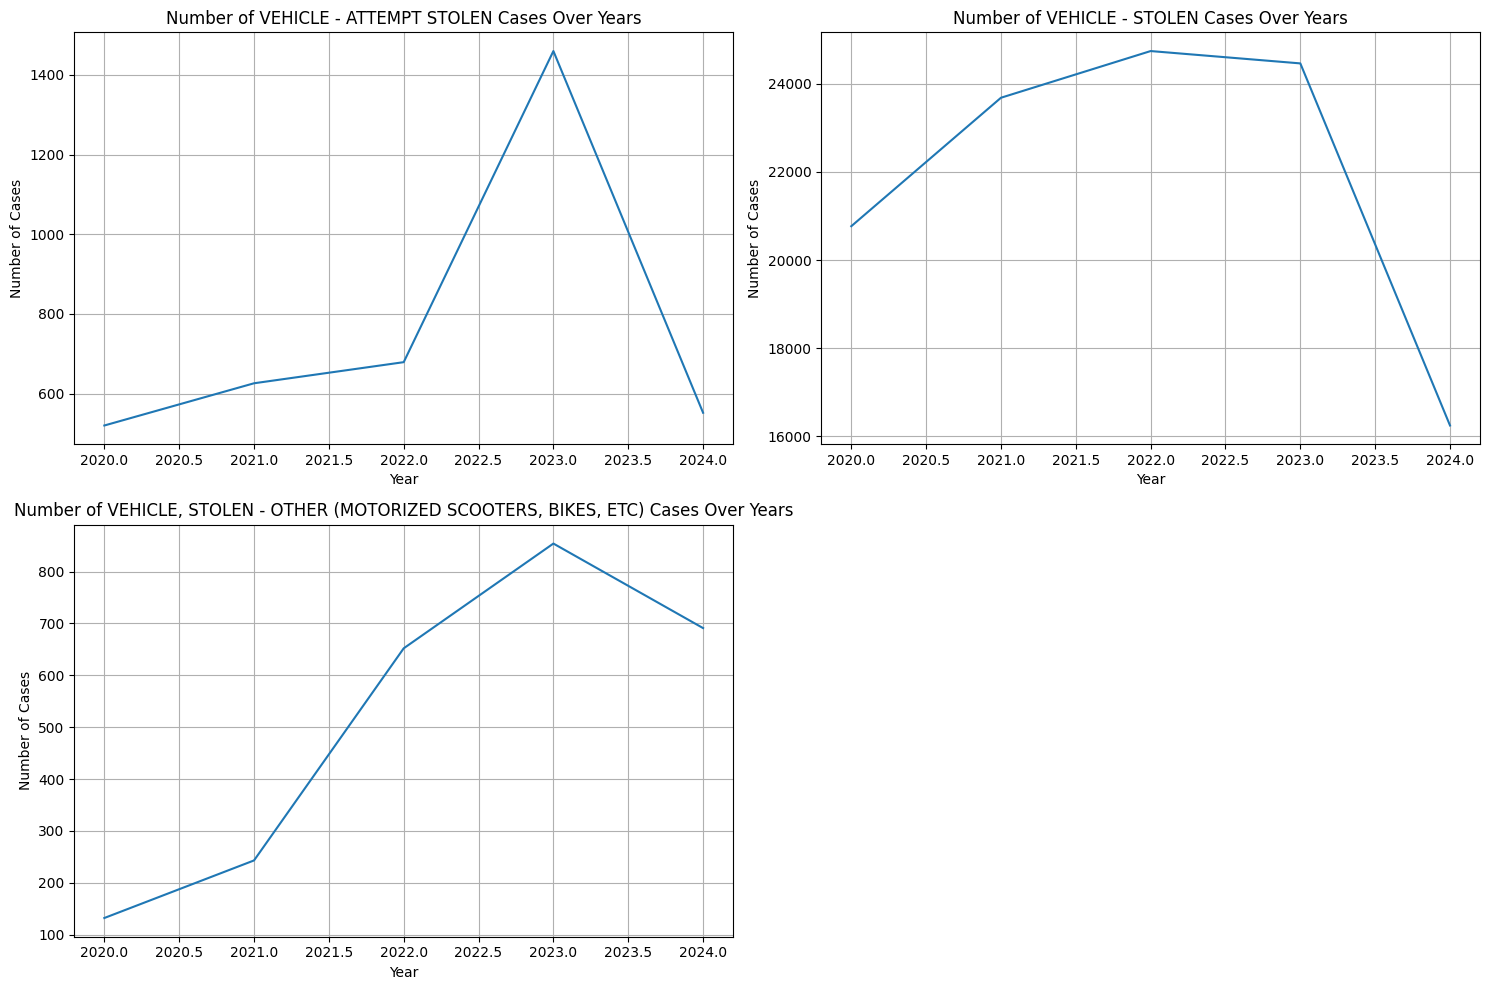

In [255]:

# Group data by crime description and year
crime_by_year = df_vehicle.groupby(['Crm Cd Desc', 'Year'])['DR_NO'].count().unstack()

# Plot the graphs
plt.figure(figsize=(15, 10))

for i, crime_desc in enumerate(crime_by_year.index):
  plt.subplot(2, 2, i + 1)
  plt.plot(crime_by_year.columns, crime_by_year.loc[crime_desc])
  plt.title(f'Number of {crime_desc} Cases Over Years')
  plt.xlabel('Year')
  plt.ylabel('Number of Cases')
  plt.grid(True)


plt.tight_layout()
plt.show()


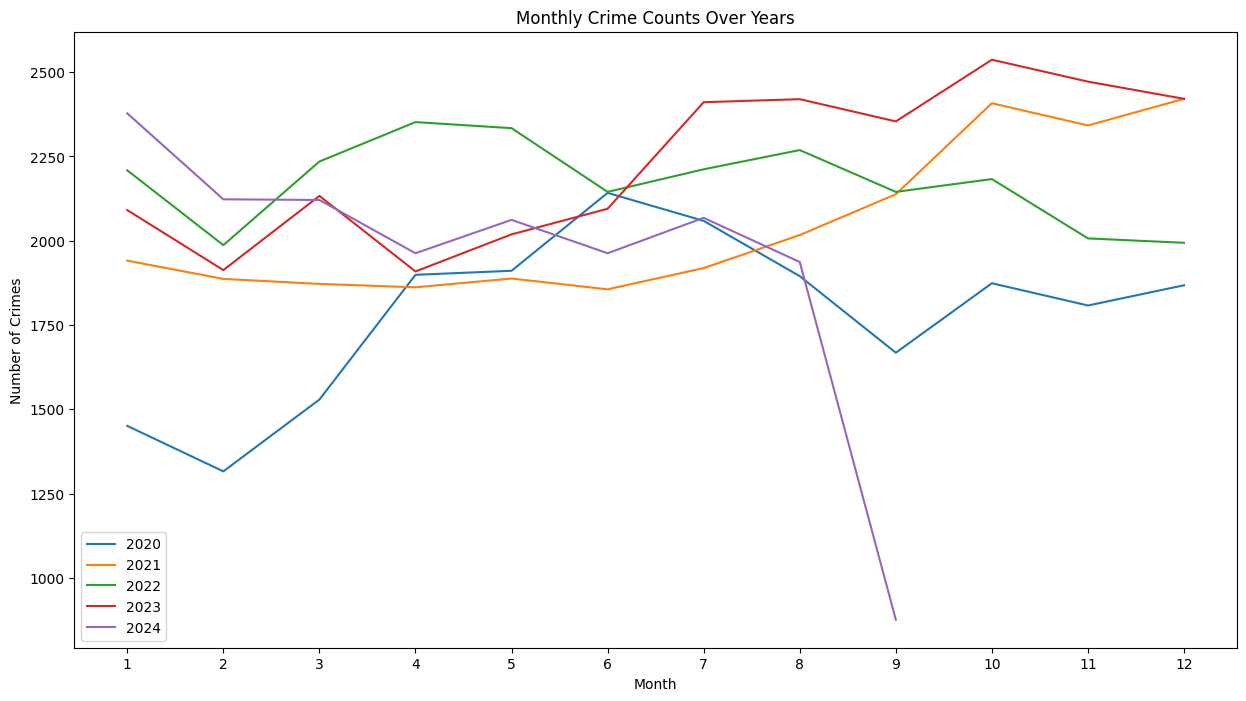

In [256]:
# A line grpah that shows trend in crime cont over a year for each year
monthly_crime_counts = df_vehicle.groupby(['Year', 'Month'])['DATE OCC'].count().unstack()

plt.figure(figsize=(15, 8))
for year in monthly_crime_counts.index:
  plt.plot(monthly_crime_counts.columns, monthly_crime_counts.loc[year], label=str(year))

plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Monthly Crime Counts Over Years')
plt.legend()
plt.xticks(range(1, 13))
plt.show()


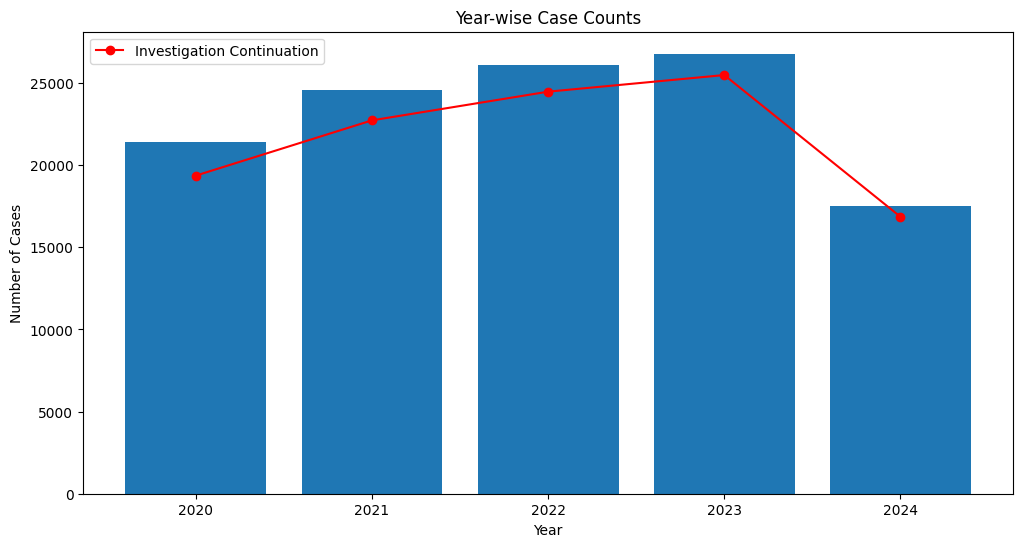

In [257]:
# Plotting a graph that shows year wise cases and also how many invest cont
year_counts = df_vehicle.groupby('Year')['DATE OCC'].count()


plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Year-wise Case Counts')

# Filter for 'Invest Cont' status
invest_cont_df = df_vehicle[df_vehicle['Status Desc'] == 'Invest Cont']

# Group by year and count the number of cases with 'Invest Cont' status
invest_cont_year_counts = invest_cont_df.groupby('Year')['DATE OCC'].count()

# Create a line graph for 'Invest Cont' status year-wise
plt.plot(invest_cont_year_counts.index, invest_cont_year_counts.values, marker='o', color='red', label='Investigation Continuation')

plt.legend()
plt.show()


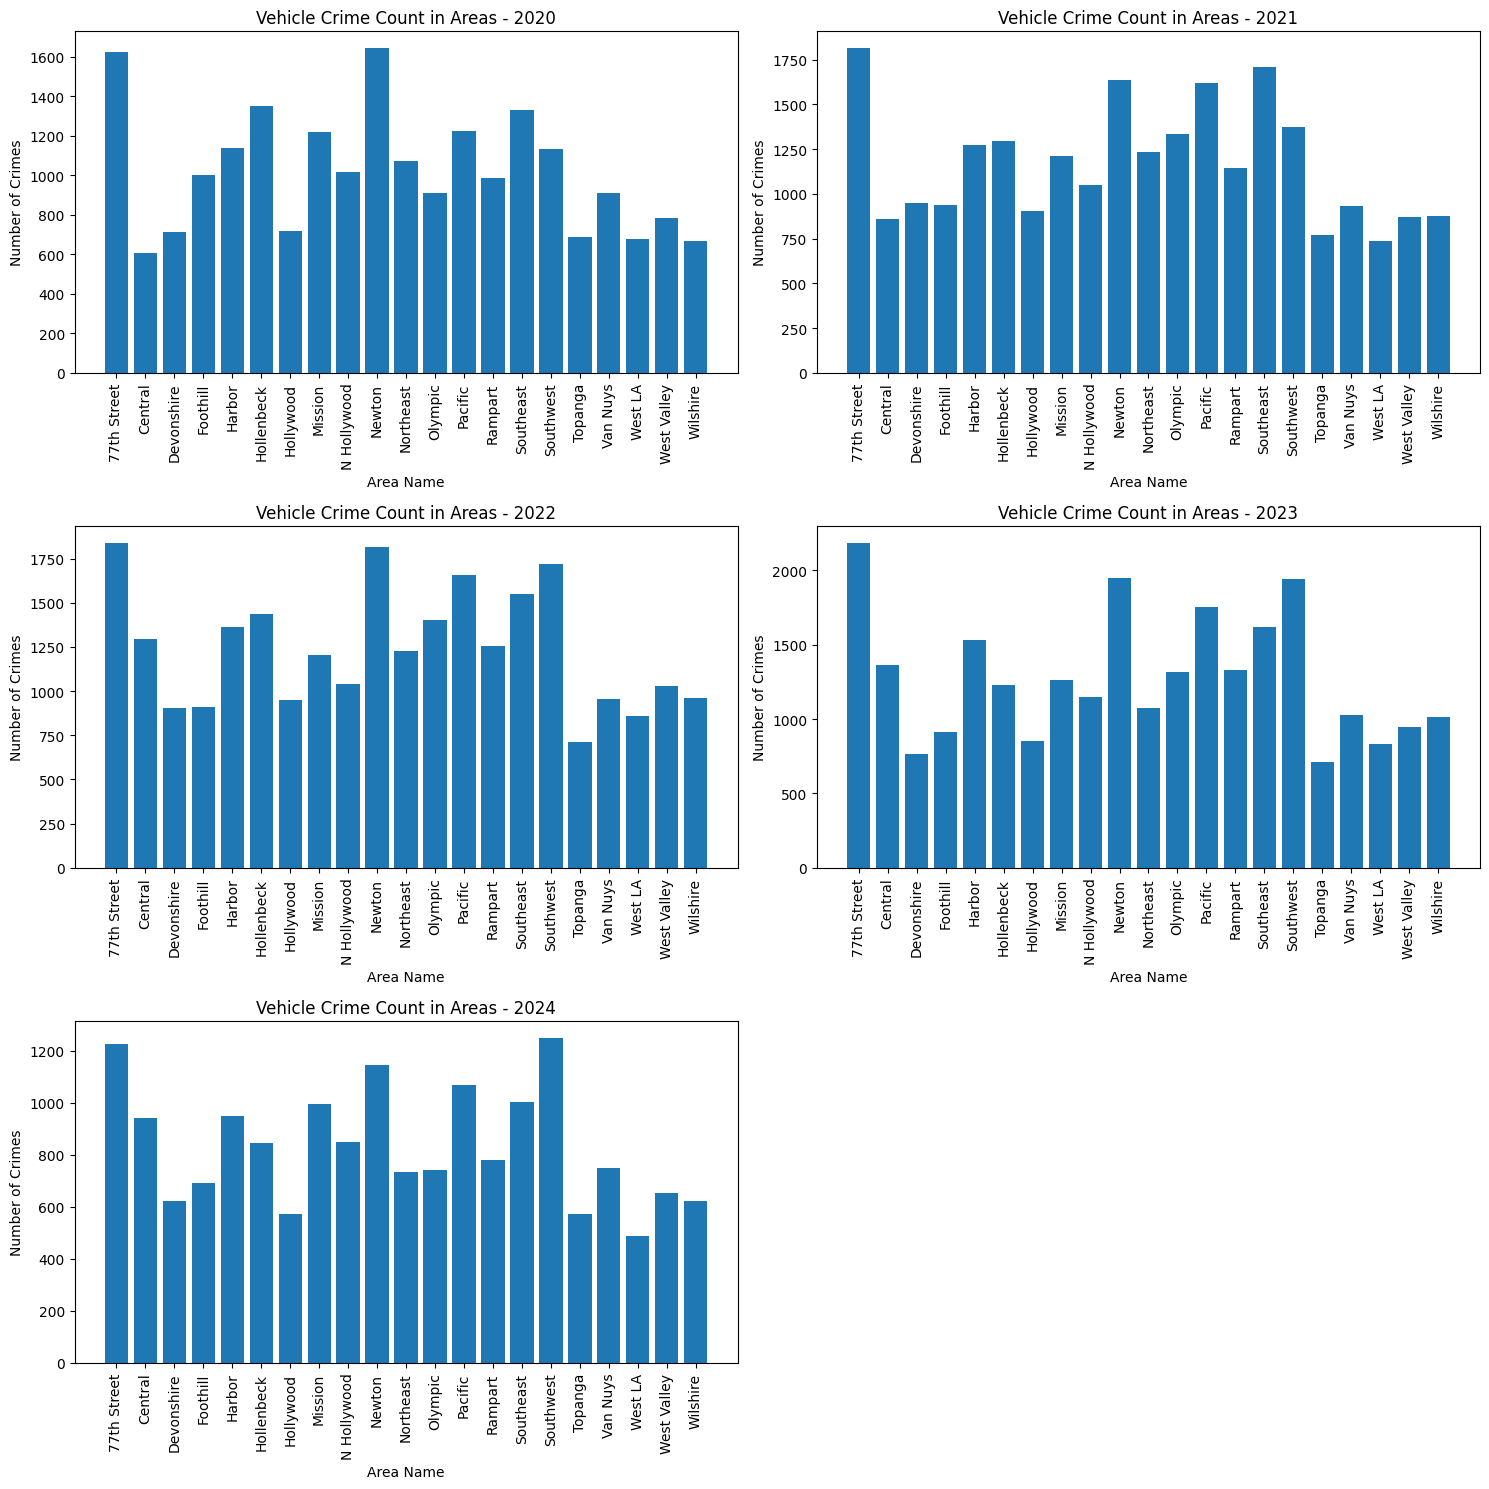

In [258]:
# Group data by area and year
area_year_counts = df_vehicle.groupby(['AREA NAME', 'Year'])['DR_NO'].count().unstack()

# Create subplots for each year
num_years = len(area_year_counts.columns)
num_rows = (num_years + 1) // 2
num_cols = 2

plt.figure(figsize=(15, num_rows * 5))

for i, year in enumerate(area_year_counts.columns):
  plt.subplot(num_rows, num_cols, i + 1)
  plt.bar(area_year_counts.index, area_year_counts[year])
  plt.title(f'Vehicle Crime Count in Areas - {year}')
  plt.xlabel('Area Name')
  plt.ylabel('Number of Crimes')
  plt.xticks(rotation=90)
  plt.tight_layout()

plt.show()


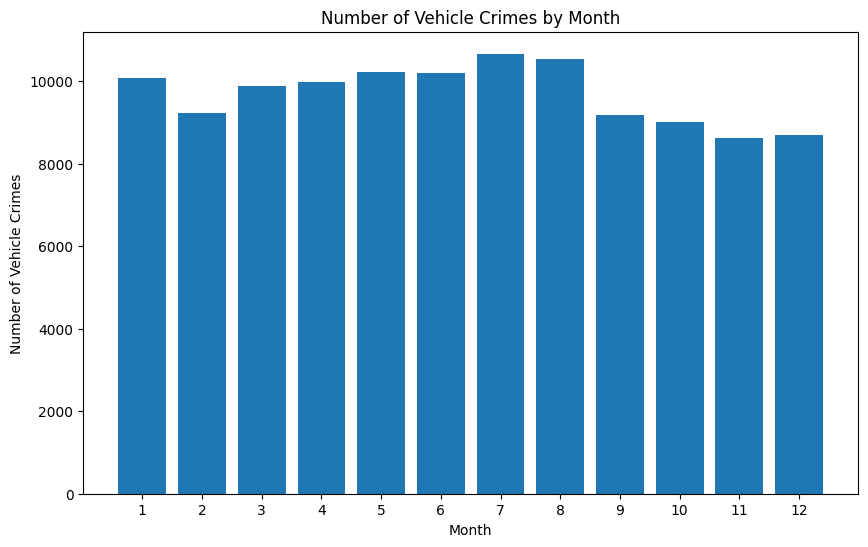

In [259]:

# Group data by month and count the number of crimes
monthly_crime_counts = df_vehicle.groupby('Month')['DR_NO'].count()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_crime_counts.index, monthly_crime_counts.values)

plt.xlabel('Month')
plt.ylabel('Number of Vehicle Crimes')
plt.title('Number of Vehicle Crimes by Month')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months (1-12)

# Show the plot
plt.show()


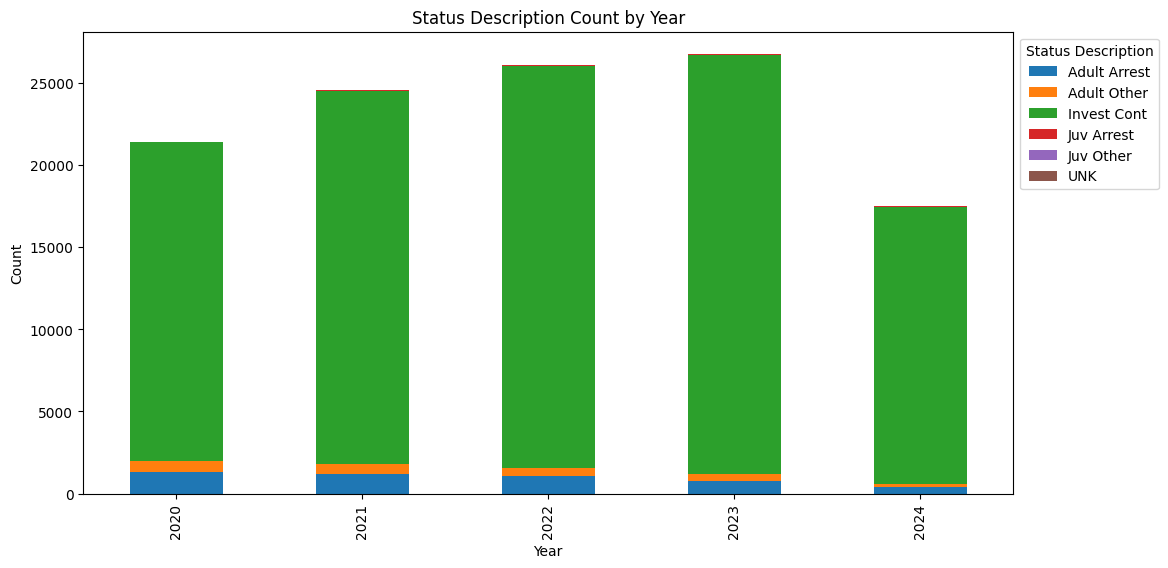

In [260]:
# Ploting a graph between Year and Status Description of Crime
status_desc_by_year = df_vehicle.groupby(['Year', 'Status Desc'])['Status Desc'].count().unstack()
status_desc_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Status Description Count by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Status Description', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


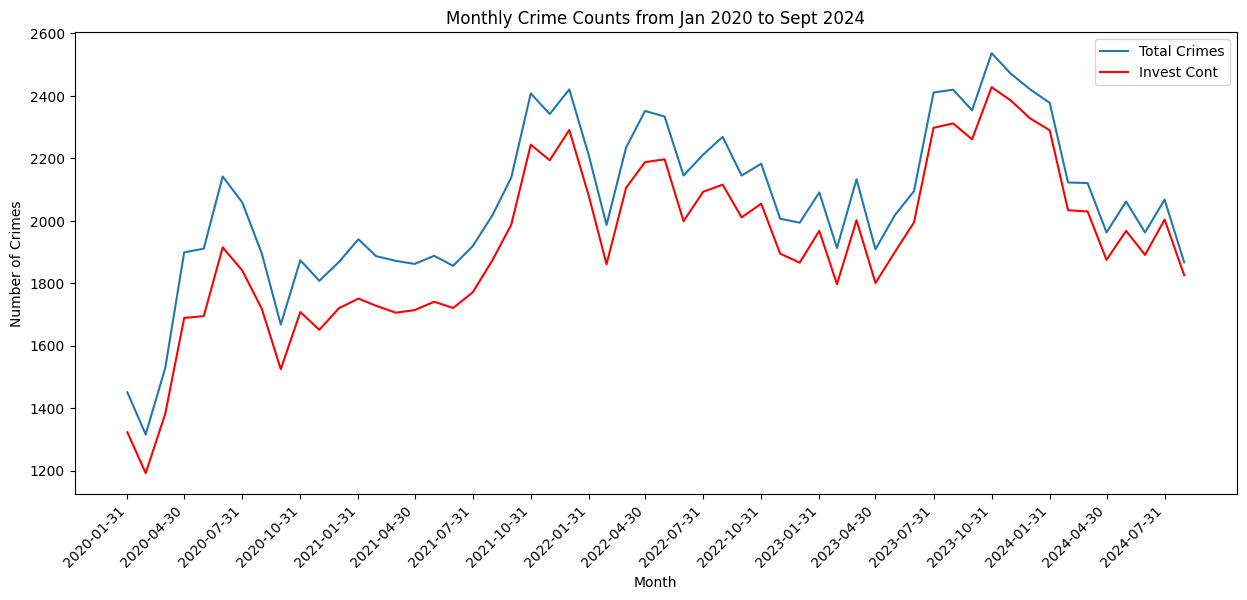

In [261]:
# Plotting a graph of Monthly crime occurance from 01 2020 to 08 2024
df_vehicle_filtered = df_vehicle[(df_vehicle['DATE OCC'] >= '2020-01-01') & (df_vehicle['DATE OCC'] <= '2024-08-30')]
monthly_crime_counts = df_vehicle_filtered.groupby(pd.Grouper(key='DATE OCC', freq='M'))['DATE OCC'].count()

plt.figure(figsize=(15, 6))
plt.plot(monthly_crime_counts.index, monthly_crime_counts.values, label='Total Crimes')

invest_cont_df_filtered = df_vehicle_filtered[df_vehicle_filtered['Status Desc'] == 'Invest Cont']
monthly_invest_cont_counts = invest_cont_df_filtered.groupby(pd.Grouper(key='DATE OCC', freq='M'))['DATE OCC'].count()

plt.plot(monthly_invest_cont_counts.index, monthly_invest_cont_counts.values, label='Invest Cont', color='red')

plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Monthly Crime Counts from Jan 2020 to Sept 2024')

plt.xticks(monthly_crime_counts.index[::3], rotation=45, ha='right')
plt.legend()
plt.show()


#### iv.  Implement your approach to this problem and justify your hypothesis.
To see how the crime has changed over years I have done analysis of crime changes  over years, months and in which area crime rate is the highest.
- The no. of vehicle theft in LA had increasted from 2020 to 2023, highest in 2023 and then the numbers are goining down in 2024
- The crime is high in Jan and increases till August, higest in July and after August there is slight drop in crime rate
- Central, 77th Street, and Southwest areas consistently have the highest number of vehicle theft cases compared to other areas.
- The Status Descption Investigation follows the same tred as the no. of crime comitted.

### d. Exploring cases in Identity Theft Cases in Los Angeles:

#### Problem Statement : What demographic of people are more prone to Identity Theft ?

To see which demographic is in danger we need to consider the Sex of the Victim, the age of the Victim and what is the Descent of the Victim. By considering this we can find out out of these which type of person is most prone to identity theft.

Important Features :
- `Vict Sex`
- `Vict Age`
- `Vict Descent`

In [262]:
# creating a data frame that only has data related to Identity Theft Cases
df_identity=df[df['Crm Cd Desc']=='THEFT OF IDENTITY']

In [263]:
df_identity.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,formatted_time,hour
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28.0,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,1900-01-01 12:00:00,12
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,1822 0100 0930 0929,41.0,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463,1900-01-01 23:00:00,23
6,230110144,04/04/2023 12:00:00 AM,07/03/2020 12:00:00 AM,900,1,Central,182,2,354,THEFT OF IDENTITY,0930 0929,25.0,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620,1900-01-01 09:00:00,9
7,220314085,07/22/2022 12:00:00 AM,05/12/2020 12:00:00 AM,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,0100,27.0,F,B,248.0,CELL PHONE STORE,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,2500 S SYCAMORE AV,NaN,34.0335,-118.3537,1900-01-01 11:10:00,11
8,231309864,04/28/2023 12:00:00 AM,12/09/2020 12:00:00 AM,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,0100,24.0,F,B,750.0,CYBERSPACE,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1300 E 57TH ST,NaN,33.9911,-118.2521,1900-01-01 14:00:00,14


In [264]:
df_identity.shape

(60428, 30)

#### ii. Perform data cleaning to get the pure data for this problem. Explain your data cleaning steps.

1. Removing all the columns that has null values greater than 75% beacuse there is no use of these columns and rows, all this will create is abnormality in data.

In [265]:
df_identity=df_identity.dropna(thresh=df_identity.shape[0]*0.75,axis=1)
df_identity=df_identity.dropna()

2. Removing columns that are not useful or contains one unique value only because these columns won't give us any insight


In [266]:
df_identity=df_identity.drop(columns=['Crm Cd','Crm Cd Desc','Crm Cd 1','formatted_time','Part 1-2'])


3. Changing the Vict Descent to full names for better understanding

In [271]:
df_identity['Vict Descent'].replace({
    "A": "Other Asian",
    "B": "Black",
    "C": "Chinese",
    "D": "Cambodian",
    "F": "Filipino",
    "G": "Guamanian",
    "H": "Hispanic/Latin/Mexican",
    "I": "American Indian/Alaskan Native",
    "J": "Japanese",
    "K": "Korean",
    "L": "Laotian",
    "O": "Other",
    "P": "Pacific Islander",
    "S": "Samoan",
    "U": "Hawaiian",
    "V": "Vietnamese",
    "W": "White",
    "X": "Unknown",
    "Z": "Asian Indian"
}, inplace=True)


4. Cleaning the Vict Sex column by assigning all the other values except `M` and `F` as `Unknown` to make data more clearer.

In [272]:
df_identity['Vict Sex'] = df_identity['Vict Sex'].apply(lambda x: x if x in ['M', 'F'] else 'Unknown')

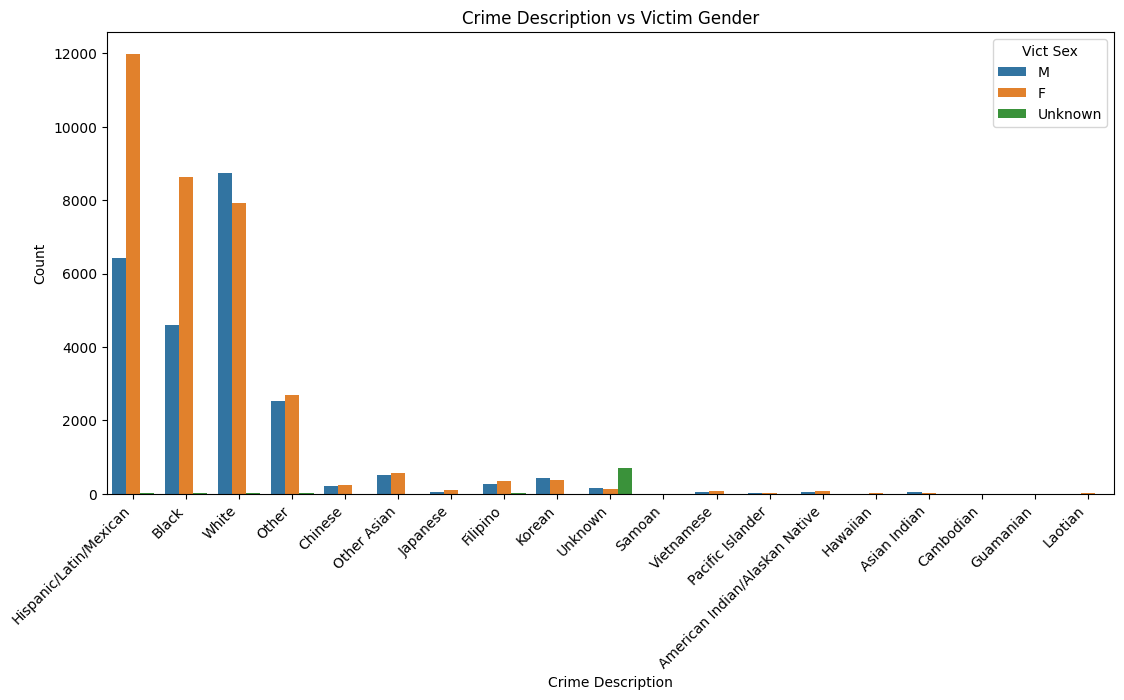

In [273]:
plt.figure(figsize=(13, 6))
sns.countplot(x='Vict Descent', hue='Vict Sex', data=df_identity)
plt.title('Crime Description vs Victim Gender')
plt.xlabel('Crime Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


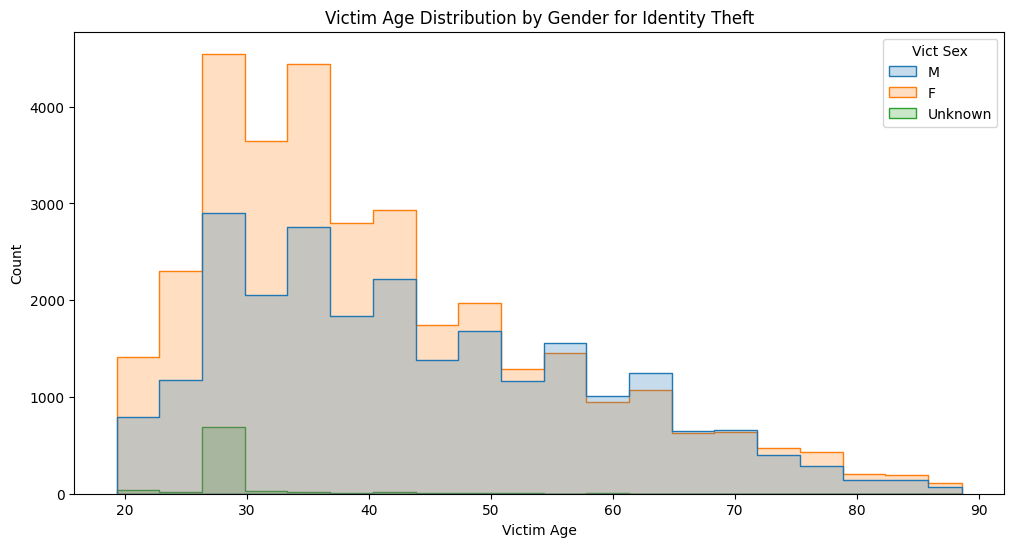

In [274]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Vict Age', hue='Vict Sex', data=df_identity, bins=20, element='step', stat='count', shrink=0.8)
plt.title('Victim Age Distribution by Gender for Identity Theft')
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.show()


### Insights

- Demographics of Victims: Hispanic/Latin/Mexican, Black, and White individuals are most frequently affected by identity theft.

- Gender Vulnerability: Females are generally more vulnerable than males to identity theft, across most of these descent categories.

- Age Vulnerability: The age group 28-38 is at the highest risk, with women in this age range being more vulnerable than men.

- Disproportionate Impact: Hispanic/Latin/Mexican, Black, and White females aged 28-38 face a higher risk of identity theft than other demographic groups.